In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [2]:
Fraud_check= pd.read_csv("Downloads/Fraud_check.csv")

In [3]:
Fraud_check.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
#Fraud_check=pd.get_dummies(Fraud_check,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
Fraud_check.loc[Fraud_check["Taxable.Income"] <= 30000,"Taxable_Income"]="Risky"
Fraud_check.loc[Fraud_check["Taxable.Income"] > 30001,"Taxable_Income"]="Good"

In [6]:
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
Fraud_check["Undergrad"] = label_encoder.fit_transform(Fraud_check["Undergrad"])
Fraud_check["Marital.Status"] = label_encoder.fit_transform(Fraud_check["Marital.Status"])
Fraud_check["Urban"] = label_encoder.fit_transform(Fraud_check["Urban"])
Fraud_check["Taxable_Income"] = label_encoder.fit_transform(Fraud_check["Taxable_Income"])
Fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [9]:
Fraud_check.drop(['City.Population'],axis=1,inplace=True)
Fraud_check.drop(['Taxable.Income'],axis=1,inplace=True)

In [11]:
Fraud_check["Taxable_Income"].unique()

array([0, 1])

In [12]:
Fraud_check

,Undergrad,Marital.Status,Work.Experience,Urban,Taxable_Income
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0
...,...,...,...,...,...
595,1,0,7,1,0
596,1,0,2,1,0
597,0,0,0,1,0
598,1,1,17,0,0


In [13]:
x = Fraud_check.iloc[:,0:4]
y = Fraud_check["Taxable_Income"]

In [14]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [15]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
model.get_n_leaves()

167

In [17]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

0    103
1     17
dtype: int64

In [18]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [19]:
np.mean(preds==y_test)

0.6916666666666667

In [21]:
pd.crosstab(y_test,preds)

col_0,0,1
Taxable_Income,,
0,79,13
1,24,4


In [22]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       103
           1       0.14      0.24      0.18        17

    accuracy                           0.69       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.76      0.69      0.72       120



In [23]:
model_gini = DecisionTreeClassifier(criterion='gini')

In [24]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
model_gini.get_n_leaves()

171

In [26]:
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    98
1    22
dtype: int64

In [27]:
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [28]:
np.mean(preds==y_test)

0.65

In [29]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78        98
           1       0.14      0.18      0.16        22

    accuracy                           0.65       120
   macro avg       0.47      0.47      0.47       120
weighted avg       0.68      0.65      0.67       120



In [32]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [33]:
preds = model_R.predict(x_test) 

In [34]:
np.mean(preds==y_test)

0.5333333333333333

In [35]:
model_R.score=(x_test,y_test)

In [36]:
model_R.score

(     Undergrad  Marital.Status  Work.Experience  Urban
 159          1               2                1      0
 307          0               0               25      0
 253          1               2               29      0
 528          0               1               10      0
 137          1               2                6      0
 ..         ...             ...              ...    ...
 102          1               0               23      0
 577          1               1                5      1
 18           1               0                6      0
 560          0               0               24      0
 62           0               0               13      1
 
 [120 rows x 4 columns],
 159    0
 307    0
 253    0
 528    0
 137    1
       ..
 102    0
 577    0
 18     0
 560    0
 62     0
 Name: Taxable_Income, Length: 120, dtype: int32)

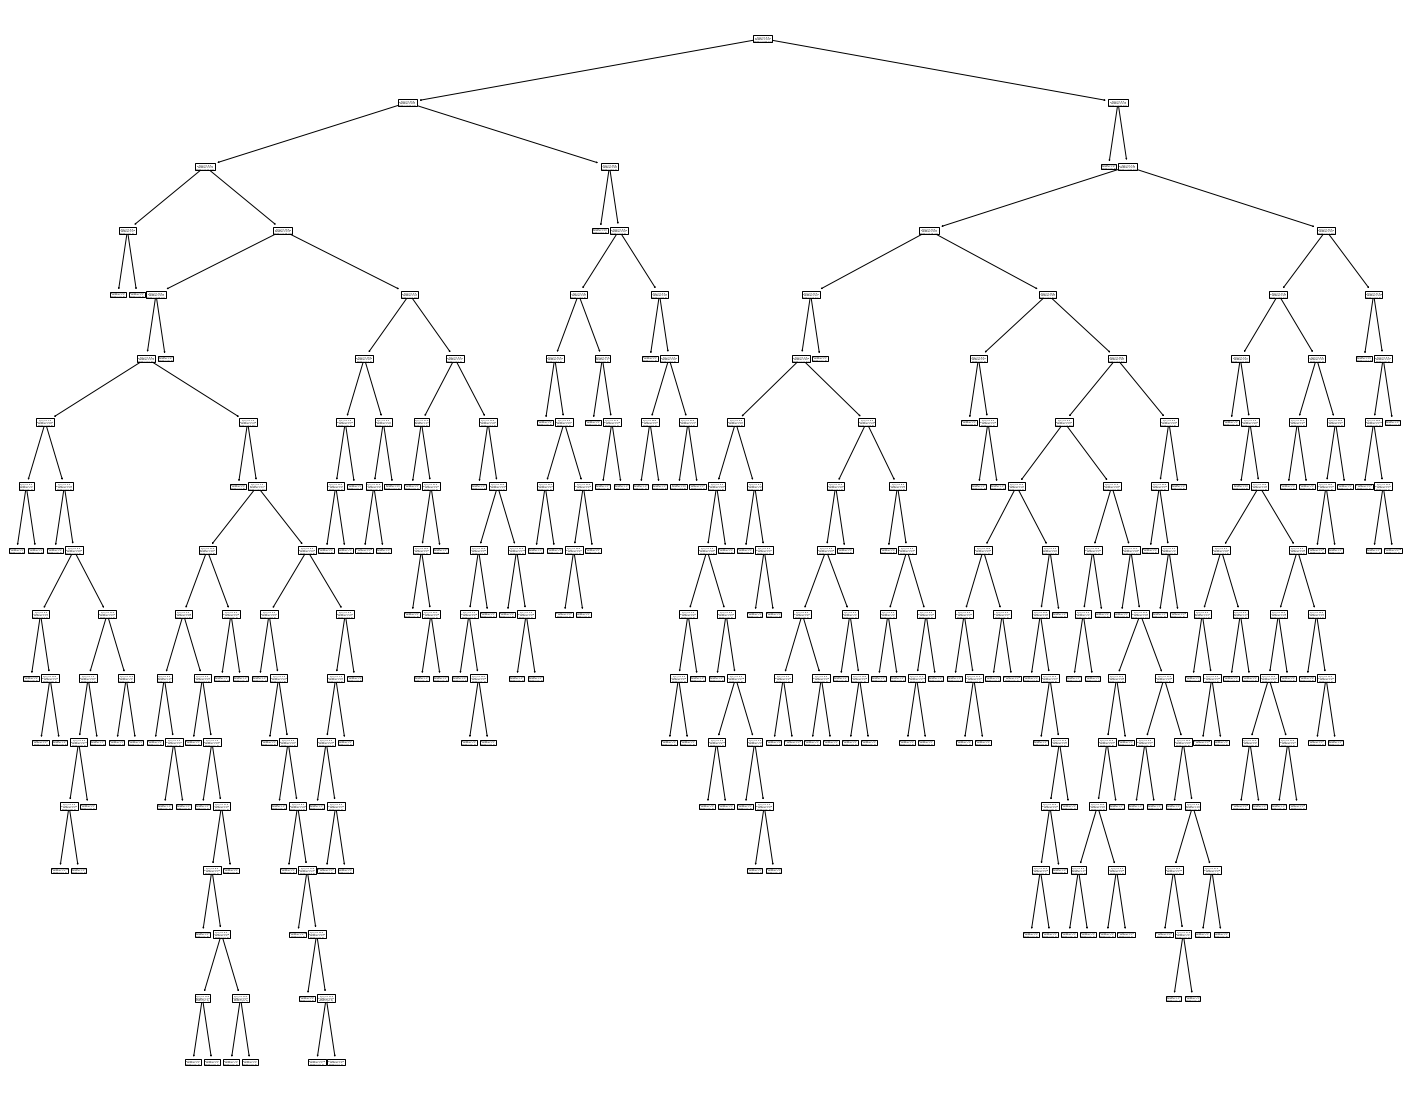

In [38]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model)

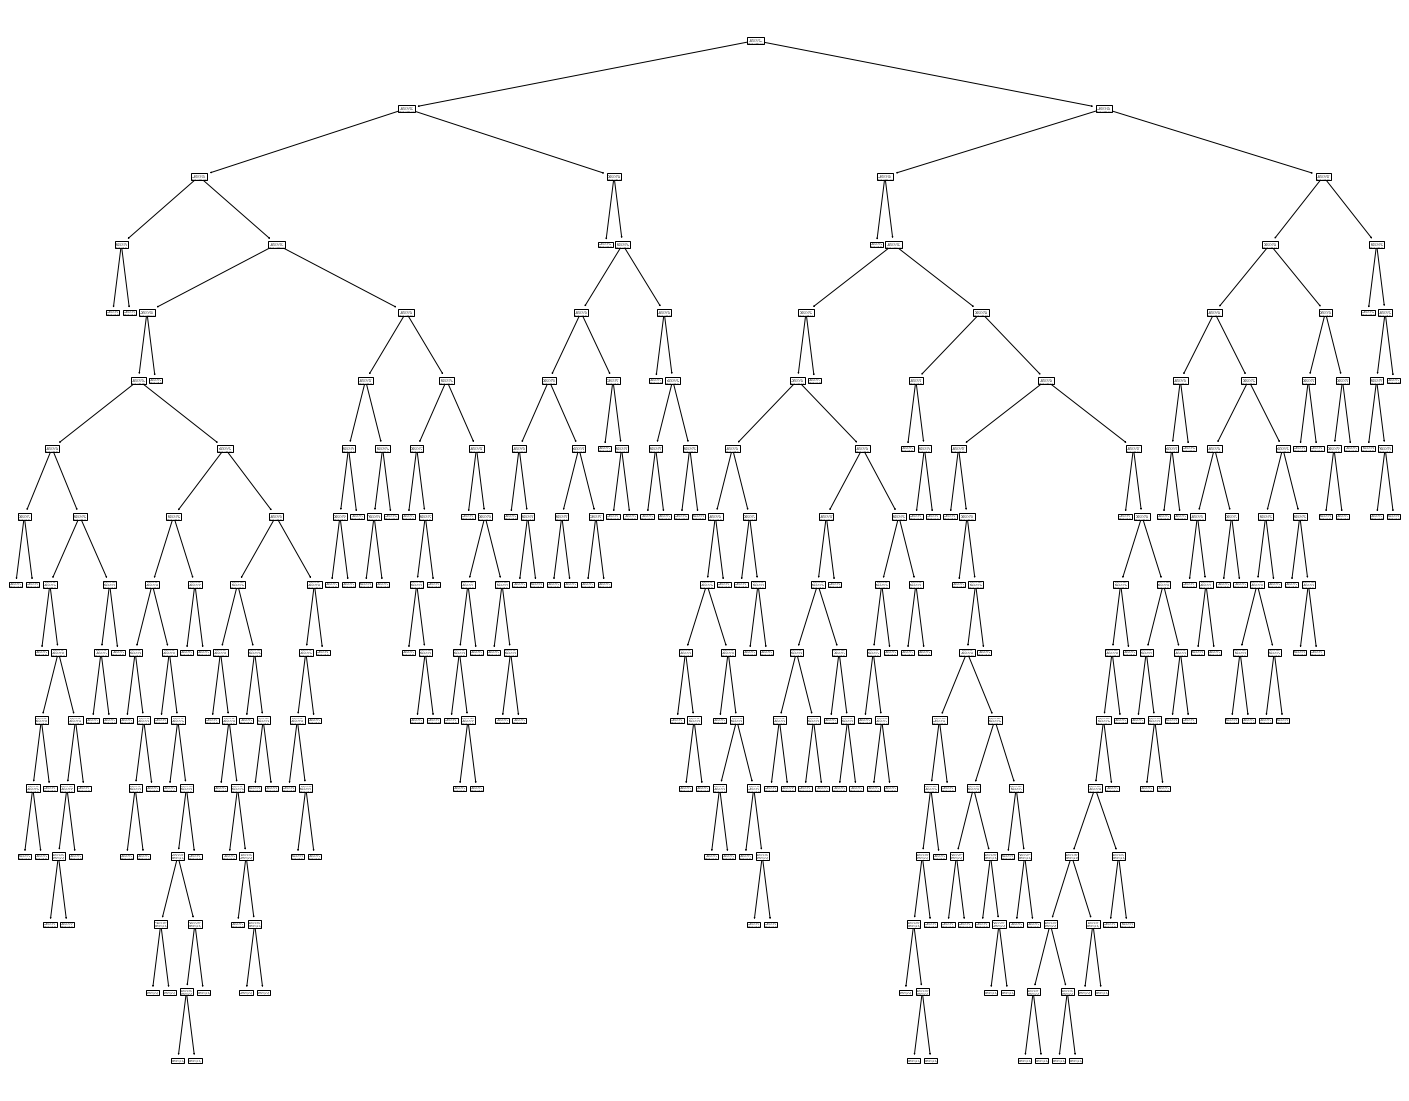

In [39]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini)

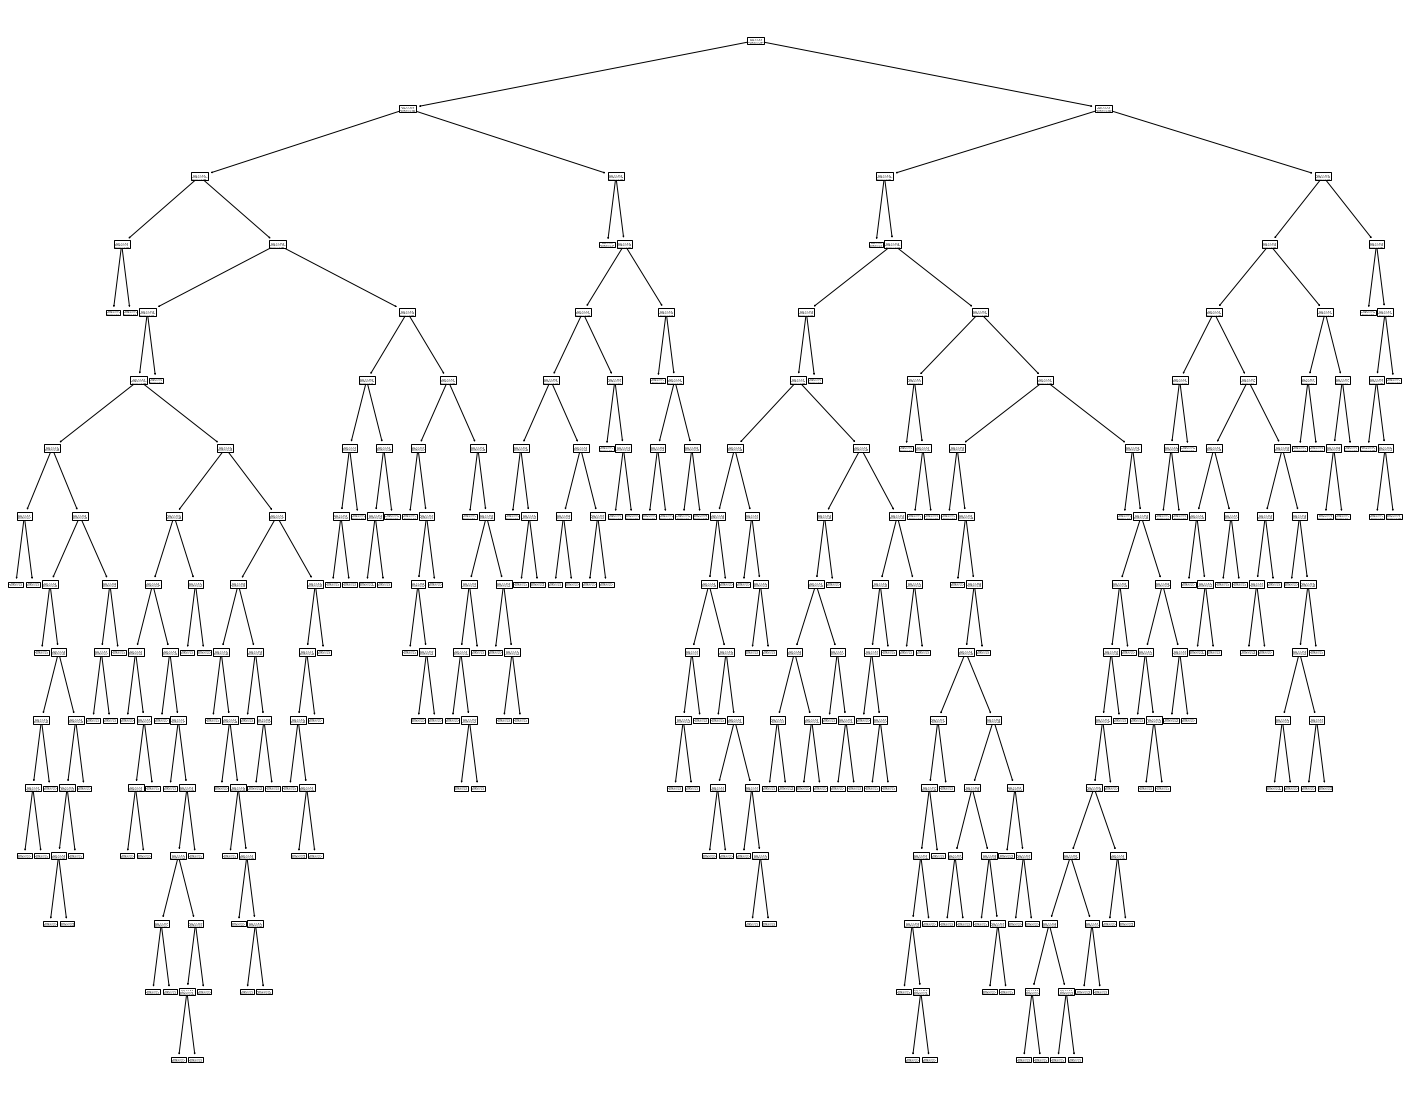

In [40]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)

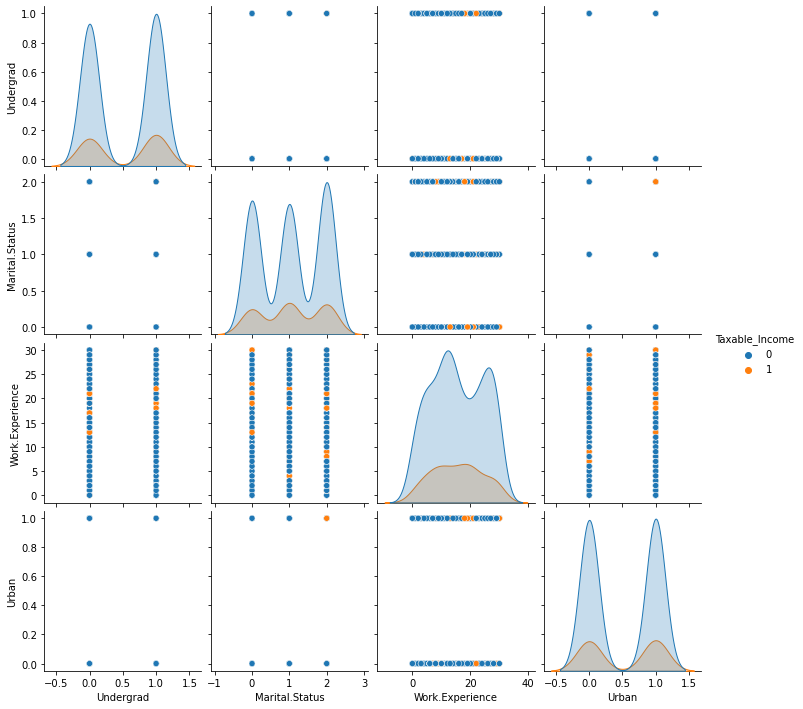

In [44]:
sns.pairplot(data=Fraud_check, hue = 'Taxable_Income')

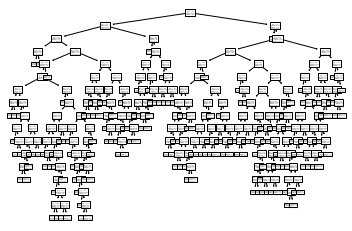

In [45]:
tree.plot_tree(model);